<a href="https://colab.research.google.com/github/AkkXu/Job-Salary-Predictor-2025/blob/main/AI%20Job%20Salary%20Predictor%202025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI Job Salary Predictor 2025


This notebook demonstrates the step-by-step process of building a machine learning model to predict salaries of AI-related roles using real-world data from Kaggle.

Dataset used: [Kaggle - Global AI Job Market and Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025/data)

We will go through the following stages:
- Exploratory Data Analysis (EDA)
- Data Cleaning
- Feature Engineering & Transformation
- Model Preparation

This notebook is intended for educational purposes and demonstrates a practical application of end-to-end data science workflow.


#1.Load and Explore Dataset


##1.1 Import required libraries

In [ ]:
# Install all required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
# Import required libraries
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

##1.2 Load the dataset (CSV)

In [ ]:
#upload file
from google.colab import files
uploaded = files.upload()

Saving ai_job_dataset.csv to ai_job_dataset (1).csv


In [ ]:
df = pd.read_csv("ai_job_dataset.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


##1.3 EDA (Exploratory Data Analysis)

In this section, we perform an initial analysis of the dataset to understand its structure, quality, and statistical properties. This helps uncover patterns, detect anomalies, and prepare the data for modeling

###1 Data shape checking

In [ ]:
print("shape of data:", df.shape)

shape of data: (15000, 19)


2 Columns name checking


In [ ]:
print(df.columns)

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')


###2 Missing values and data type checking




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

###3 Explore salary distribution

In [ ]:
df['salary_usd'].describe()

,salary_usd
count,15000.000000
mean,115348.965133
std,60260.940438
min,32519.000000
25%,70179.750000
50%,99705.000000
75%,146408.500000
max,399095.000000


<Axes: xlabel='salary_usd', ylabel='Count'>

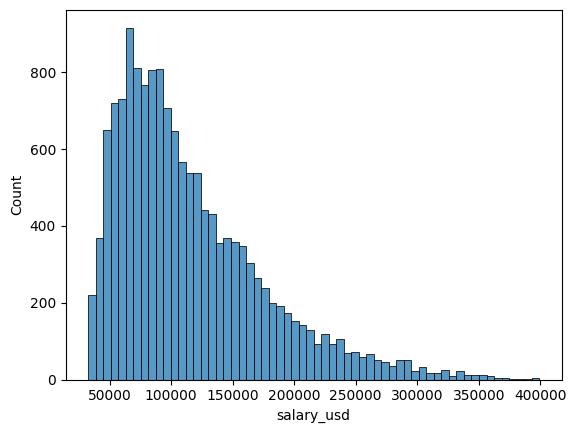

In [ ]:
sns.histplot(df['salary_usd'])

###4 Salary outlier detection

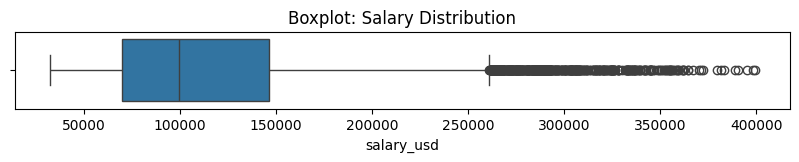

In [ ]:
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['salary_usd'])
plt.title("Boxplot: Salary Distribution")
plt.show()

###5 Unique values checking

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
unique_counts = {col: df[col].nunique() for col in categorical_cols}
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=["Column", "Unique Values"])
unique_counts_df

,Column,Unique Values
0,job_id,15000
1,job_title,20
2,salary_currency,3
3,experience_level,4
4,employment_type,4
5,company_location,20
6,company_size,3
7,employee_residence,20
8,required_skills,13663
9,education_required,4


###6 Correlation matrix checking

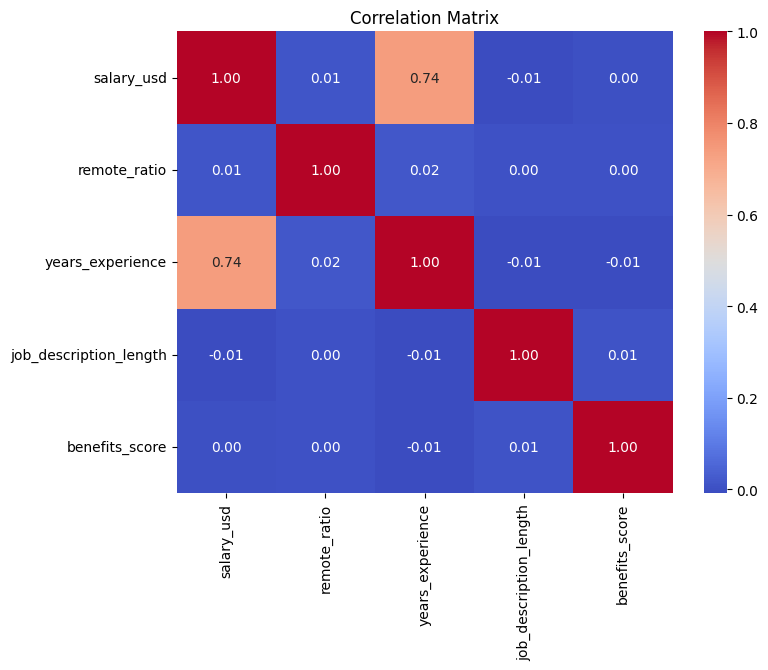

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#2.Data Preparation

This section focuses on preparing the dataset for machine learning modeling. It includes data cleaning, feature engineering, and transformation techniques. Proper preparation ensures that the dataset is consistent, informative, and suitable for different types of models.

We will go through the following key stages:

- 2.1 Data Cleaning  
- 2.2 Feature Engineering  
- 2.3 Feature Transform and Analysis

##2.1 Data Cleaning


In this step, we clean and prepare the raw dataset by:
- Removing unnecessary or irrelevant columns
- Removing duplicate records to avoid data leakage or bias
- Fixing incorrect data types (e.g., converting date strings to datetime)

Proper cleaning helps ensure that the data is consistent and ready for analysis or modeling.

###1 Drop unnecessary column

In [ ]:
df_clean = df.drop(['job_id','salary_currency', 'application_deadline', 'job_description_length'], axis=1)

In [ ]:
df_clean.sample(5)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,benefits_score,company_name
7393,ML Ops Engineer,88824,EN,FL,Denmark,M,Denmark,50,"Statistics, Tableau, Python, TensorFlow, Git",Associate,0,Retail,2024-09-07,6.5,AI Innovations
1138,Head of AI,122018,EX,CT,India,S,India,100,"Docker, AWS, Kubernetes, Scala, Statistics",Master,14,Education,2024-05-28,5.6,Predictive Systems
9571,AI Specialist,55632,EN,CT,Netherlands,S,Singapore,50,"Data Visualization, Git, Hadoop, Mathematics, ...",Master,0,Transportation,2024-11-29,7.2,Neural Networks Co
11241,Machine Learning Engineer,114180,EX,PT,Austria,M,China,50,"Deep Learning, Git, Docker, Hadoop",Master,16,Manufacturing,2025-01-08,5.1,Neural Networks Co
7464,Principal Data Scientist,185958,EX,PT,Australia,L,United States,100,"Kubernetes, R, Spark, SQL, Java",PhD,13,Consulting,2024-04-07,5.8,Cognitive Computing


###2 Remove duplicates

In [ ]:
#shape checking before remove duplicate
df_clean.shape

(15000, 15)

In [ ]:
df_clean.drop_duplicates(inplace=True)

In [ ]:
#shape checking after remove duplicate
df_clean.shape

(15000, 15)

###3 Data type fixing

In [ ]:
df_clean['posting_date'] = pd.to_datetime(df_clean['posting_date'])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   job_title           15000 non-null  object        
 1   salary_usd          15000 non-null  int64         
 2   experience_level    15000 non-null  object        
 3   employment_type     15000 non-null  object        
 4   company_location    15000 non-null  object        
 5   company_size        15000 non-null  object        
 6   employee_residence  15000 non-null  object        
 7   remote_ratio        15000 non-null  int64         
 8   required_skills     15000 non-null  object        
 9   education_required  15000 non-null  object        
 10  years_experience    15000 non-null  int64         
 11  industry            15000 non-null  object        
 12  posting_date        15000 non-null  datetime64[ns]
 13  benefits_score      15000 non-null  float64   

##2.2 Feature Engineering

Here, we enhance the dataset by creating and transforming features that may improve model performance.

We cover:
- Encoding categorical features based on the type of model (Label Encoding for tree-based, One-Hot for linear models)
- Handling multi-valued categorical columns like `required_skills` using techniques such as skill count or multi-hot encoding
- Creating new meaningful features such as:
  - `job_country_match`: whether the employee's location matches the company's location
  - `is_junior`: flag indicating junior-level roles
  - `days_since_posted`: number of days since job posting

###1.Encode categorical features

In [ ]:
df_col = df_clean.copy()
df_col.drop(['required_skills'], axis = 1, inplace = True)
categorical_cols = df_col.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['job_title', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'education_required', 'industry', 'company_name']


####1.1 for RF, XGB models

In [ ]:
df_tree = df_clean.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_tree[col] = le.fit_transform(df_tree[col].astype(str))

In [ ]:
df_tree.sample(5)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,benefits_score,company_name
7374,6,143355,1,1,3,1,3,0,"Java, Scala, Hadoop, AWS, Mathematics",0,18,7,2024-12-30,6.3,12
2781,4,224047,3,3,4,0,4,100,"TensorFlow, R, Computer Vision, Docker, Python",1,5,7,2024-01-27,9.0,15
10861,18,151379,1,3,16,1,16,100,"Tableau, Deep Learning, NLP, Azure",0,15,6,2024-11-20,9.7,7
3873,6,63991,2,3,10,2,10,50,"Deep Learning, GCP, PyTorch",3,3,11,2024-04-09,9.2,15
12456,1,113050,3,1,7,2,7,0,"Deep Learning, Computer Vision, MLOps",1,8,8,2024-06-30,8.0,15


####1.2 for linear regression

In [ ]:
df_copy = df_clean.copy()

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder_features = encoder.fit_transform(df_copy[categorical_cols])
encode_df = pd.DataFrame(encoder_features, columns=encoder.get_feature_names_out(categorical_cols))
df_linear = pd.concat([df_copy.drop(columns=categorical_cols), encode_df], axis=1)
df_linear.sample(5)

,salary_usd,remote_ratio,required_skills,years_experience,posting_date,benefits_score,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Research Scientist,job_title_AI Software Engineer,...,company_name_DataVision Ltd,company_name_DeepTech Ventures,company_name_Digital Transformation LLC,company_name_Future Systems,company_name_Machine Intelligence Group,company_name_Neural Networks Co,company_name_Predictive Systems,company_name_Quantum Computing Inc,company_name_Smart Analytics,company_name_TechCorp Inc
5362,104209,50,"AWS, Data Visualization, SQL",5,2024-07-17,6.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4738,70615,100,"MLOps, Scala, Linux, Mathematics",4,2024-10-29,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7723,77475,50,"Java, Scala, AWS, Docker, Deep Learning",9,2025-03-16,5.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6618,77350,50,"Git, Kubernetes, Data Visualization, R, Tableau",4,2025-04-09,8.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6260,55969,0,"Kubernetes, Data Visualization, GCP, Hadoop",0,2024-10-17,8.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_linear.shape

(15000, 103)

###2.Handle with multi valued categorical feature

####2.1 Count number of skills

In [ ]:
df_tree['skill_count'] = df_tree['required_skills'].fillna('').apply(lambda x: len(x.split(',')))
df_linear['skill_count'] = df_copy['required_skills'].fillna('').apply(lambda x: len(x.split(',')))

In [ ]:
df_linear.sample(2)

,salary_usd,remote_ratio,required_skills,years_experience,posting_date,benefits_score,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Research Scientist,job_title_AI Software Engineer,...,company_name_DeepTech Ventures,company_name_Digital Transformation LLC,company_name_Future Systems,company_name_Machine Intelligence Group,company_name_Neural Networks Co,company_name_Predictive Systems,company_name_Quantum Computing Inc,company_name_Smart Analytics,company_name_TechCorp Inc,skill_count
11605,198957,100,"TensorFlow, Spark, Python, Tableau",19,2024-01-23,7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3757,53577,50,"Python, Linux, Computer Vision",3,2025-01-28,7.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
df_tree.sample(2)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,benefits_score,company_name,skill_count
7364,2,190864,1,2,7,0,7,100,"SQL, PyTorch, Java, Computer Vision, R",0,13,8,2025-01-05,5.8,10,5
9122,2,174949,1,1,18,2,18,0,"Scala, Linux, PyTorch",3,10,12,2024-02-20,9.0,5,3


####2.2 Multi-hot encoding

This is my first time to use a Multi-hot encode

In [ ]:
mlb = MultiLabelBinarizer()
skills = df_copy['required_skills'].fillna('').apply(lambda x: [s.strip() for s in x.split(',')])
skills_encoded = mlb.fit_transform(skills)
skills_df = pd.DataFrame(skills_encoded, columns=mlb.classes_)

#join to df_tree and df_linear
df_linear = pd.concat([df_linear.reset_index(drop=True), skills_df], axis=1)
df_tree = pd.concat([df_tree.reset_index(drop=True), skills_df], axis=1)

####2.3 Drop required_skills

In [ ]:
df_tree.drop(['required_skills'], axis=1, inplace=True)
df_linear.drop(['required_skills'], axis=1, inplace=True)

In [ ]:
df_linear.sample(3)

,salary_usd,remote_ratio,years_experience,posting_date,benefits_score,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Research Scientist,job_title_AI Software Engineer,job_title_AI Specialist,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
14973,78429,0,4,2024-04-02,5.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
6420,95572,100,18,2024-03-06,7.4,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6455,265990,50,16,2024-11-04,9.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
df_tree.sample(3)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
4982,5,65507,0,0,15,0,0,50,0,1,...,0,0,1,0,0,0,0,0,0,0
976,9,167739,3,3,14,0,14,0,0,6,...,0,0,0,0,0,0,0,0,1,1
2375,4,50017,0,2,8,1,8,50,0,0,...,0,1,0,0,0,0,0,0,0,1


###3.Create new features

####3.1 Job_country_match

In [ ]:
df_tree['job_country_match'] = (df_copy['company_location'] == df_copy['employee_residence']).astype(int)
df_linear['job_country_match'] = (df_copy['company_location'] == df_copy['employee_residence']).astype(int)

####3.2 Is_junior

In [ ]:
df_tree['is_junior'] = df_copy['experience_level'].apply(lambda x: 1 if x in ['EN', 'JU'] else 0)
df_linear['is_junior'] = df_copy['experience_level'].apply(lambda x: 1 if x in ['EN', 'JU'] else 0)

####3.3 days_since_posted

In [ ]:
latest_date = df_copy['posting_date'].max()
df_tree['day_since_posted'] = (latest_date - df_copy['posting_date']).dt.days
df_linear['days_since_posted'] = (latest_date - df_copy['posting_date']).dt.days
#drop posting_date from df_tree and df_linear
df_tree.drop(['posting_date'], axis=1, inplace=True)
df_linear.drop(['posting_date'], axis=1, inplace=True)

In [ ]:
df_tree.sample(3)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,...,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow,job_country_match,is_junior,day_since_posted
882,17,94589,3,0,2,2,2,50,3,7,...,0,0,0,0,0,0,0,1,0,434
1181,0,42732,0,1,9,0,9,0,2,0,...,0,0,0,0,1,0,0,1,1,369
150,16,57266,2,1,9,1,9,0,1,3,...,0,0,0,0,0,0,1,1,0,262


In [ ]:
df_linear.sample(3)

,salary_usd,remote_ratio,years_experience,benefits_score,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Research Scientist,job_title_AI Software Engineer,job_title_AI Specialist,job_title_Autonomous Systems Engineer,...,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow,job_country_match,is_junior,days_since_posted
14132,168553,100,6,9.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,482
14307,52428,0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,22
2428,69033,50,2,5.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,207


##2.3 Feature Transform and Analysis

In this section, we apply final transformations to prepare the data for modeling:

- **Salary transformation**: Applying log-scale to the salary to reduce skewness and normalize distribution.
- **Feature scaling**: Scaling numerical features (for linear models) using techniques such as standardization.
- **Feature selection**: Selecting important features using techniques like Lasso Regression for linear models.

These steps ensure the features are on compatible scales and optimized for each model type.

###1.Salary transformation (Log-scale)

In [ ]:
df_tree['log_salary'] = np.log1p(df_tree['salary_usd'])
df_linear['log_salary'] = np.log1p(df_linear['salary_usd'])

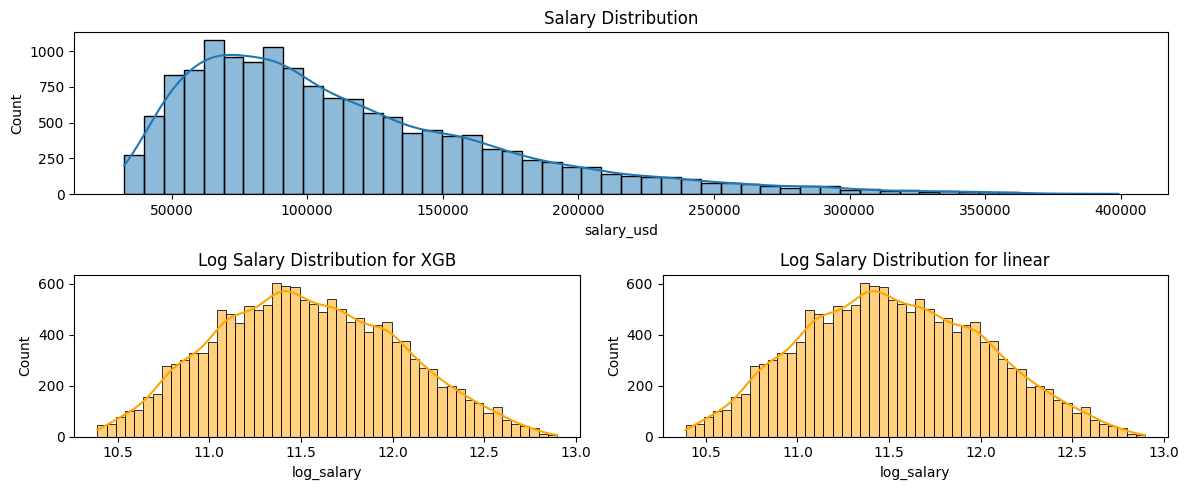

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram before log
plt.subplot(2, 1, 1)
sns.histplot(df_tree['salary_usd'], bins=50, kde=True)
plt.title('Salary Distribution')

# Histogram after log (XGB)
plt.subplot(2, 2, 3)
sns.histplot(df_tree['log_salary'], bins=50, kde=True, color='orange')
plt.title('Log Salary Distribution for XGB')


# Histogram after log (Linear)
plt.subplot(2, 2, 4)
sns.histplot(df_linear['log_salary'], bins=50, kde=True, color='orange')
plt.title('Log Salary Distribution for linear')

plt.tight_layout()
plt.show()

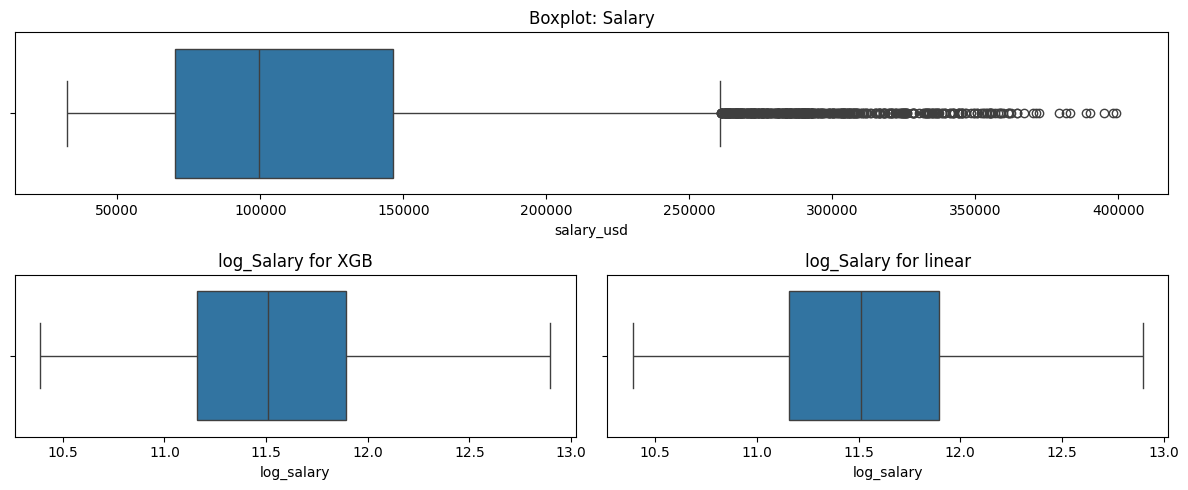

In [ ]:
plt.figure(figsize=(12, 5))

# Boxplot before log
plt.subplot(2, 1, 1)
sns.boxplot(x=df_tree['salary_usd'])
plt.title("Boxplot: Salary")

# Boxplot after log (XGB)
plt.subplot(2, 2, 3)
sns.boxplot(x=df_tree['log_salary'])
plt.title("log_Salary for XGB")

# Boxplot after log (Linear)
plt.subplot(2, 2, 4)
sns.boxplot(x=df_linear['log_salary'])
plt.title("log_Salary for linear")

plt.tight_layout()
plt.show()

In [ ]:
#drop salary_usd from dataframe
df_tree.drop(['salary_usd'], axis=1, inplace=True)
df_linear.drop(['salary_usd'], axis=1, inplace=True)

In [ ]:
df_tree.sample(3)

,job_title,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,industry,...,SQL,Scala,Spark,Statistics,Tableau,TensorFlow,job_country_match,is_junior,day_since_posted,log_salary
6607,8,3,3,13,0,13,50,2,5,13,...,0,0,0,0,0,0,1,0,222,12.130600
648,7,3,3,2,0,13,50,1,8,11,...,0,0,0,0,0,0,0,0,481,11.923683
11000,11,3,2,7,0,7,100,1,5,14,...,1,0,0,0,0,0,1,0,338,11.920701


In [ ]:
df_linear.sample(3)

,remote_ratio,years_experience,benefits_score,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Research Scientist,job_title_AI Software Engineer,job_title_AI Specialist,job_title_Autonomous Systems Engineer,job_title_Computer Vision Engineer,...,SQL,Scala,Spark,Statistics,Tableau,TensorFlow,job_country_match,is_junior,days_since_posted,log_salary
10249,0,7,9.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,261,11.614082
7547,0,4,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,175,11.393105
706,0,18,7.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,200,12.555662


###2.Feature scaling (for linear)

In [ ]:
X_linear_ = df_linear.drop(columns=['log_salary'])
y_linear = df_linear['log_salary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_linear_)

In [ ]:
#double check the data shape again
print(X_scaled.shape[0])
print(y_linear.shape[0])

15000
15000


###3 Feature selection (for linear with Lasso)

select the best feature with lasso method

In [ ]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y_linear)

#select the feature that coefficient =! 0
selected_features = X_linear_.columns[lasso.coef_ != 0]
X_linear = X_linear_[selected_features]
X_linear.sample(5)


,remote_ratio,years_experience,job_title_AI Consultant,job_title_AI Research Scientist,job_title_AI Software Engineer,job_title_AI Specialist,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,job_title_Head of AI,...,skill_count,Azure,Deep Learning,GCP,Hadoop,MLOps,NLP,SQL,TensorFlow,is_junior
5325,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,0,0,1,0,0,0,0,0
11328,100,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,0,0,0,0,0,0,0,0,0
2348,0,11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4,0,0,0,0,0,0,0,0,0
4773,50,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,0,0,0,1,0,0,1,1
11001,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,0,0,0,1,0,1,0,0


#4.Modeling

##4.1 Split data into train/test sets

In this section, we build and evaluate machine learning models to predict AI job salaries.

The modeling pipeline includes the following key steps:

- 4.1 Splitting the dataset into training and testing sets for different model types  
- 4.2 Training multiple regression models including:
  - XGBoost
  - Random Forest
  - Linear Regression  
- 4.3 Comparing model performance using metrics such as MAE, RMSE, and R²

####1.For XGB

In [ ]:
X_tree = df_tree.drop(['log_salary'], axis=1)
y_tree = df_tree['log_salary']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tree, y_tree, test_size=0.2, random_state = 42)

####2.For linear

In [ ]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_linear, y_linear, test_size=0.2, random_state = 42)

##4.2 Train multiple models

####1.XGBoost

In [ ]:
#train model
xgb = XGBRegressor(n_estimators = 100, random_state = 42)
xgb.fit(X_train_t, y_train_t)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
#predict
y_pred_xgb = xgb.predict(X_test_t)

####2.Random Forest

In [ ]:
#train model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train_t, y_train_t)

RandomForestRegressor(random_state=42)

In [ ]:
#predict
y_pred_rf = rf.predict(X_test_t)

####3.Linear Regression

In [ ]:
#train model
lr = LinearRegression()
lr.fit(X_train_l, y_train_l)

LinearRegression()

In [ ]:
#predict
y_pred_lr = lr.predict(X_test_l)

##4.3 Compare model performance

In [ ]:
def score(name, y_actual, y_pred):
    print(f"Model: {name}")
    print(f"MAE : {mean_absolute_error(y_actual, y_pred):.4f}")
    print(f"MSE: {np.sqrt(mean_squared_error(y_actual, y_pred)):.4f}")
    print(f"R2  : {r2_score(y_actual, y_pred):.4f}")
    print("-" * 30)

In [ ]:
# XGBoost
score("XGBoost", y_test_t, y_pred_xgb)
# Random Forest
score("Random Forest", y_test_t, y_pred_rf)
# Linear Regression
score("Linear Regression", y_test_l, y_pred_lr)

Model: XGBoost
MAE : 0.1253
MSE: 0.1500
R2  : 0.9085
------------------------------
Model: Random Forest
MAE : 0.1253
MSE: 0.1496
R2  : 0.9089
------------------------------
Model: Linear Regression
MAE : 0.1188
MSE: 0.1398
R2  : 0.9205
------------------------------


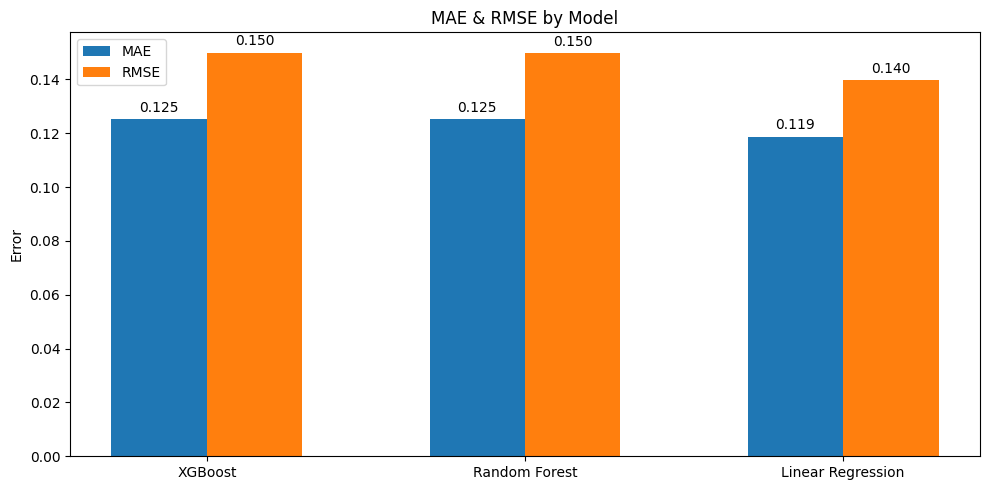

XGBoost R²: 0.9085
Random Forest R²: 0.9089
Linear Regression R²: 0.9205


In [ ]:
models = ['XGBoost', 'Random Forest', 'Linear Regression']

#MAE
mae = [
    mean_absolute_error(y_test_t, y_pred_xgb),
    mean_absolute_error(y_test_t, y_pred_rf),
    mean_absolute_error(y_test_l, y_pred_lr)
]

#RMSE
rmse = [
    np.sqrt(mean_squared_error(y_test_t, y_pred_xgb)),
    np.sqrt(mean_squared_error(y_test_t, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test_l, y_pred_lr))
]

#R²
r2 = [
    r2_score(y_test_t, y_pred_xgb),
    r2_score(y_test_t, y_pred_rf),
    r2_score(y_test_l, y_pred_lr)
]

#graph
x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, mae, width, label='MAE')
rects2 = ax.bar(x + width/2, rmse, width, label='RMSE')

ax.set_ylabel('Error')
ax.set_title('MAE & RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

#add value on the graph
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

#show R2
for name, score in zip(models, r2):
    print(f"{name} R²: {score:.4f}")

#5.Evaluation

In this final stage, we evaluate the performance of our trained models and gain insights into how well they generalize.

This section includes:

- **5.1 Evaluate predictions**  
  We use standard regression metrics such as:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R² score)

- **5.2 Plot actual vs predicted salary**  
  A scatter plot to visually compare the model's predictions with actual salary values.

- **5.3 Analyze residuals**  
  We examine residuals (prediction errors) to check for bias, trends, or violations of model assumptions.

- **5.4 Feature importance visualization**  
  For tree-based models, we visualize feature importances to understand which variables contribute most to the prediction.

##5.1 Evaluate predictions (MAE, RMSE, R²)

In [ ]:
def score(name, y_actual, y_pred):
    print(f"Model: {name}")
    print(f"MAE : {mean_absolute_error(y_actual, y_pred):.4f}")
    print(f"MSE: {np.sqrt(mean_squared_error(y_actual, y_pred)):.4f}")
    print(f"R2  : {r2_score(y_actual, y_pred):.4f}")
    print("-" * 30)

score("Linear Regression", y_test_l, y_pred_lr)

Model: Linear Regression
MAE : 0.1188
MSE: 0.1398
R2  : 0.9205
------------------------------


##5.2 Plot actual vs predicted salary

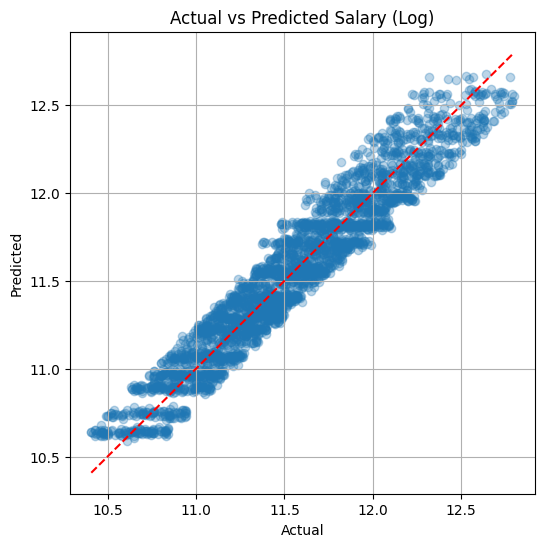

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_l, y_pred_lr, alpha=0.3)
plt.plot([y_test_l.min(), y_test_l.max()], [y_test_l.min(), y_test_l.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary (Log)')
plt.grid(True)
plt.show()

### 5.2 Plot Actual vs Predicted Salary (Log)

Here we're plotting the predicted salary values from our model against the actual salary values — both in **log scale** (since we applied a log transformation earlier).

- Each blue dot represents one data point (a job).
- The x-axis shows the **actual** (log) salary.
- The y-axis shows the **predicted** (log) salary.
- The red dashed line is the "perfect prediction" line — if the model predicted perfectly, all the dots would fall exactly on this line.

What we want to see:
- If the dots are close to the red line → great, the model is doing well.
- If they're far off or form a weird pattern → maybe we need to improve the model or features.

In this case, we can see the predictions are quite well-aligned with the actuals — most points are tightly clustered along the line, which is a good sign


##5.3 Analyze residuals

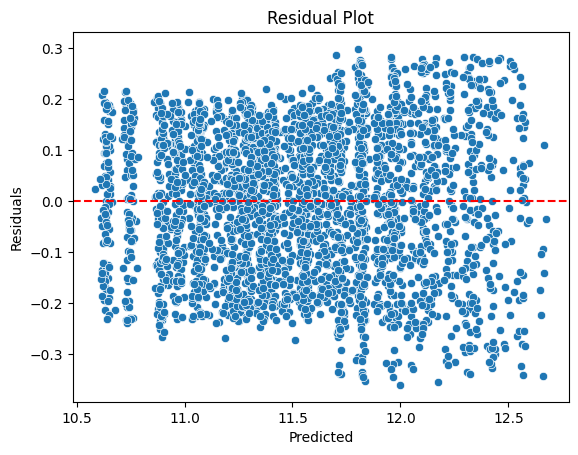

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test_l - y_pred_lr
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Here we take a look at how far off the model's predictions were using a **Residual Plot**.

- Residuals are just: `actual - predicted` (still using log-transformed values).
- The x-axis shows the predicted values.
- The y-axis shows the residuals — how much the model was off by.

The red dashed line at 0 is the “perfect prediction” reference.  
Ideally, we want the points to be scattered randomly around that line.

What we're looking for:
- No obvious pattern or shape (like a curve, wave, or funnel) → good
- If there *is* a pattern → might mean the model is missing something (non-linearity, interaction, etc.)

In this case, the residuals look pretty well spread out and centered around zero — that's a good sign that the model's errors are random and not biased

---

We also calculated **cross-validated R²** using 5-fold cross-validation to make sure our model performs well across different parts of the data, not just on one train/test split.



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_linear, y_linear, scoring='r2', cv=5)
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.9203632932583543


This means our model explains about **92% of the variance** in salary predictions across folds — which is really solid, especially for a linear regression model!
It gives us more confidence that the model generalizes well and isn't just overfitting to one part of the data.


##5.4 Feature importance visualization

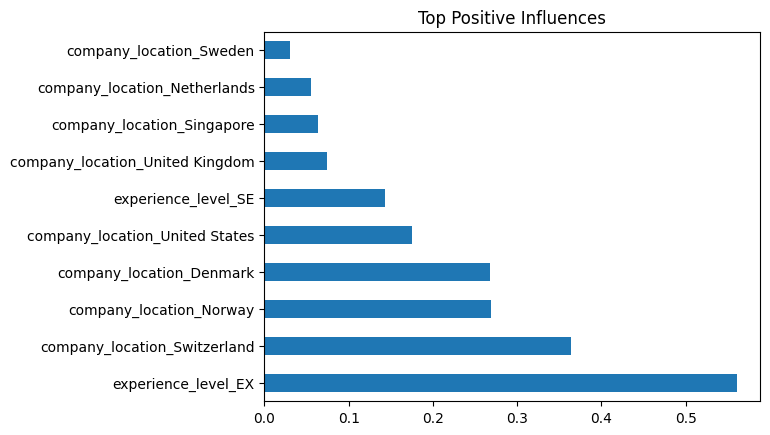

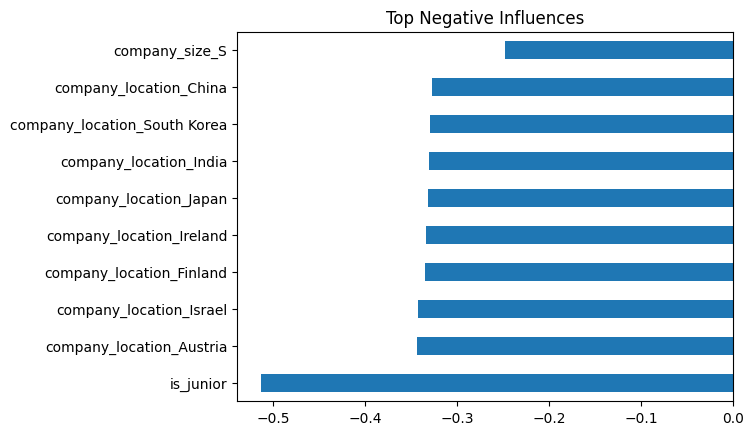

In [ ]:
importance = pd.Series(lr.coef_, index=X_test_l.columns)
importance.sort_values(ascending=False).head(10).plot(kind='barh', title='Top Positive Influences')
plt.show()

importance.sort_values(ascending=True).head(10).plot(kind='barh', title='Top Negative Influences')
plt.show()



Here we take a look at which features had the most influence on the salary predictions according to our **linear regression model**.

Since linear regression uses coefficients for each feature, we can directly interpret:
- **Positive coefficients** → feature increases predicted salary
- **Negative coefficients** → feature decreases predicted salary

---

####  Top Positive Influences

These are the features that **push the predicted salary higher**.

From the plot, we can see that:
- Experience level like `EX` (Executive) has a strong positive impact (which totally makes sense )
- Countries like Switzerland, Norway, and the US are also associated with higher salaries
- Senior-level experience (SE) also plays a strong role

---

####  Top Negative Influences

These are the features that **pull the predicted salary down**.

Not surprisingly:
- `is_junior` is the biggest negative — junior roles earn less
- Some company locations (e.g., Austria, Israel, China, India) have a lower salary impact compared to the top-paying regions
- Small company size (`S`) also contributes to slightly lower salary predictions


#6.Deployment

Once the model is trained and tested, the final step is **deployment** so it can actually be used — in this case, via a Streamlit web app.

##6.1 Save Model & Encoders for Streamlit Deployment

Here we save everything the Streamlit app will need:
- The trained linear regression model (`linear_model.pkl`)
- The OneHot encoder used for categorical features (`onehot_encoder.pkl`)
- The MultiLabelBinarizer for skill encoding (`multilabel_encoder.pkl`)
- The list of final feature column names (`feature_columns.pkl`)

In [ ]:
joblib.dump(lr, 'linear_model.pkl')

['linear_model.pkl']

In [ ]:
joblib.dump(encoder, 'onehot_encoder.pkl')

['onehot_encoder.pkl']

In [ ]:
joblib.dump(mlb, 'multilabel_encoder.pkl')

['multilabel_encoder.pkl']

In [ ]:
joblib.dump(X_train_l.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']

##6.2 Coding for Streamlit Deployment

This is where we start writing the actual **Streamlit app**

- Load the saved model and encoders
- Create input fields for the user to fill in (job title, experience level, remote %, etc.)
- Transform the inputs just like we did during training
- Run the model to predict the salary
- Show the result on screen



```
import streamlit as st
import pandas as pd
import numpy as np
import joblib

#add all model and encoder
model = joblib.load('linear_model.pkl')
encoder = joblib.load('onehot_encoder.pkl')
mlb = joblib.load('multilabel_encoder.pkl')
feature_columns = joblib.load('feature_columns.pkl')

st.title("AI Job Salary Predictor 2025")

#input for user
st.subheader("Enter Job Details")
job_title = st.selectbox("Job Title", ['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'NLP Engineer', 'AI Consultant', 'AI Architect',
       'Principal Data Scientist', 'Data Analyst',
       'Autonomous Systems Engineer', 'AI Product Manager',
       'Machine Learning Engineer', 'Data Engineer', 'Research Scientist',
       'ML Ops Engineer', 'Robotics Engineer', 'Head of AI',
       'Deep Learning Engineer', 'Data Scientist',
       'Machine Learning Researcher', 'Computer Vision Engineer'])
experience_level = st.selectbox("Experience Level", ['EN', 'MI', 'SE', 'EX'])
employment_type = st.selectbox("Employment Type", ['CT', 'FL', 'PT', 'FT'])
remote_ratio = st.slider("Remote Ratio [0 is on-site, 50 is Hybrid, 100 is remote] (%)", 0, 100, 100)
company_location = st.selectbox("Company Location", ['China', 'Canada', 'Switzerland', 'India', 'France', 'Germany',
       'United Kingdom', 'Singapore', 'Austria', 'Sweden', 'South Korea',
       'Norway', 'Netherlands', 'United States', 'Israel', 'Australia',
       'Ireland', 'Denmark', 'Finland', 'Japan'])
company_size = st.selectbox("Company Size", ["S", "M", "L"])
employee_residence = st.selectbox("Employee Residence", ['China', 'Ireland', 'South Korea', 'India', 'Singapore', 'Germany',
       'United Kingdom', 'France', 'Austria', 'Sweden', 'Norway',
       'Israel', 'United States', 'Netherlands', 'Denmark', 'Switzerland',
       'Finland', 'Japan', 'Canada', 'Australia'])
skills = st.multiselect("Required Skills", ['AWS', 'Azure', 'Computer Vision', 'Data Visualization', 'Deep Learning', 'Docker', 'GCP', 'Git', 'Hadoop', 'Java', 'Kubernetes', 'Linux', 'MLOps', 'Mathematics', 'NLP', 'PyTorch', 'Python', 'R', 'SQL', 'Scala', 'Spark', 'Statistics', 'Tableau', 'TensorFlow'])
education_required = st.selectbox("Education Level", ['Bachelor', 'Master', 'Associate', 'PhD'])
industry = st.selectbox("Industry", ['Automotive', 'Media', 'Education', 'Consulting', 'Healthcare',
       'Gaming', 'Government', 'Telecommunications', 'Manufacturing',
       'Energy', 'Technology', 'Real Estate', 'Finance', 'Transportation',
       'Retail'])
company_name = st.selectbox("Company Name", ['Smart Analytics', 'TechCorp Inc', 'Autonomous Tech',
       'Future Systems', 'Advanced Robotics', 'Neural Networks Co',
       'DataVision Ltd', 'Cloud AI Solutions', 'Quantum Computing Inc',
       'Predictive Systems', 'AI Innovations', 'Algorithmic Solutions',
       'Cognitive Computing', 'DeepTech Ventures',
       'Machine Intelligence Group', 'Digital Transformation LLC'])


#Prediction
if st.button("Predict Salary"):
    #categorical input transform to DataFrame
    input_cat = pd.DataFrame([{
        "job_title": job_title,
        "experience_level": experience_level,
        "employment_type": employment_type,
        "company_location": company_location,
        "employee_residence": employee_residence,
        "company_size": company_size,
        "education_required": education_required,
        "industry": industry,
        "company_name": company_name,
    }])
    #encoding skills with onehot
    input_cat = input_cat.reindex(columns=encoder.feature_names_in_)

    encoded_cat = encoder.transform(input_cat)
    encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out())

    #encoding skills with multihot
    skill_list = [s.strip() for s in skills]
    encoded_skill = mlb.transform([skill_list])
    skill_df = pd.DataFrame(encoded_skill, columns=mlb.classes_)

    # 3.add numeric columns
    numeric_df = pd.DataFrame([[remote_ratio, len(skill_list)]], columns=["remote_ratio", "skill_count"])

    # 4.combine all columns
    X_input = pd.concat([encoded_cat_df, skill_df, numeric_df], axis=1)
    X_input = X_input.reindex(columns=feature_columns, fill_value=0)

    # 5.predict
    log_salary = model.predict(X_input)[0]
    salary = np.expm1(log_salary)
    st.success(f"Estimated Salary: ${salary:,.2f} USD")

```



##6.3 Streamlit after deployed

Here’s how the deployed web app looks

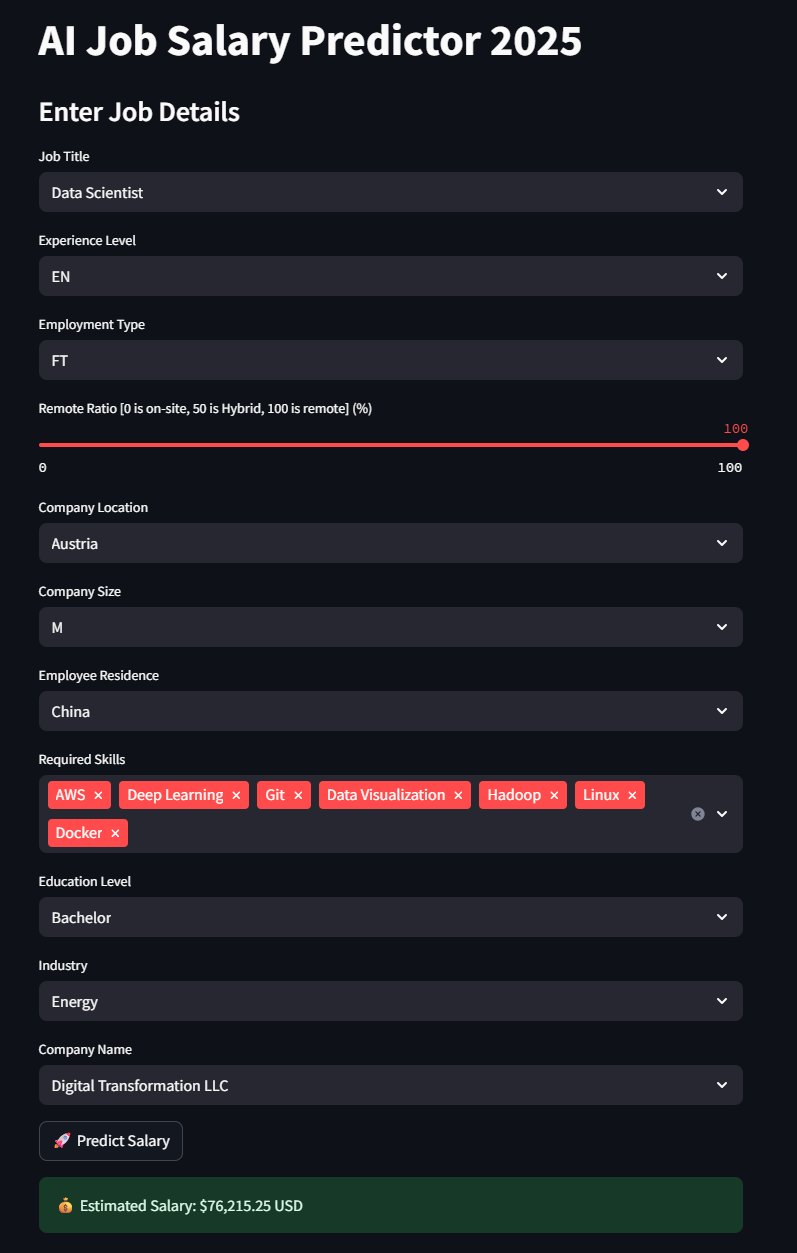